In [1]:
import pandas as pd
import numpy as np
import requests # library to handle requests
import folium
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

%matplotlib inline

In [2]:
df = pd.read_csv("data.csv")

In [3]:
districts = df['District'].unique()
districts

array(['KSD', 'KNR', 'WYD', 'KKD', 'MLPM', 'PKD', 'TSR', 'EKM', 'IDK',
       'KTYM', 'ALP', 'PTA', 'KLM', 'TVM'], dtype=object)

In [4]:
cum_data = df[['Confirmed','Recovered','Death']].cumsum()
cum_data['Active'] = df['Active']
cum_data['District'] = df['District']
cum_data.head()

,Confirmed,Recovered,Death,Active,District
0,1,0,0,1,KSD
1,1,1,0,0,KSD
2,2,1,0,1,KSD
3,3,1,0,2,KSD
4,9,1,0,8,KSD


In [5]:
df['Date'] =  pd.to_datetime(df['Date'],format='%d-%m-%Y')

In [6]:
df.head()

,Date,Confirmed,Recovered,Active,Death,District
0,2020-02-03,1,0,1,0,KSD
1,2020-02-16,0,1,0,0,KSD
2,2020-03-16,1,0,1,0,KSD
3,2020-03-19,1,0,2,0,KSD
4,2020-03-20,6,0,8,0,KSD


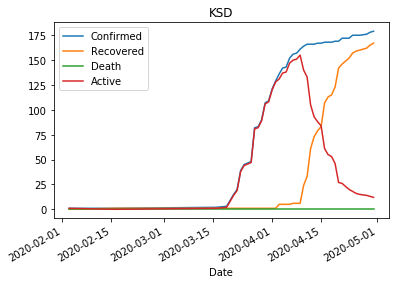

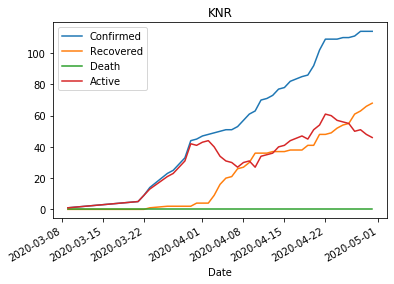

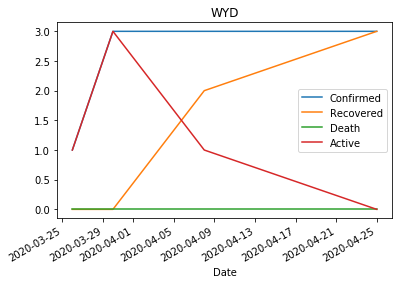

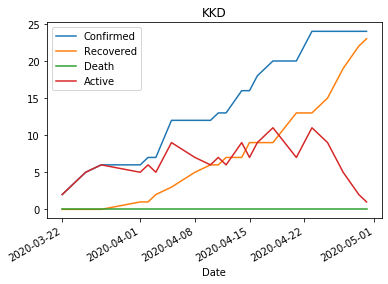

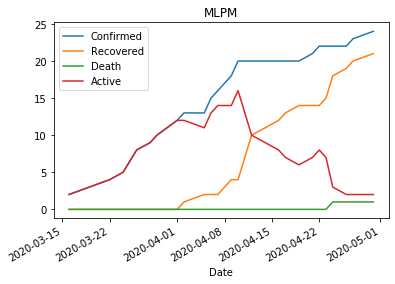

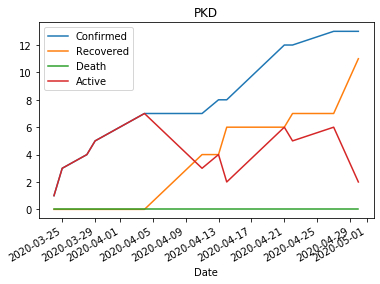

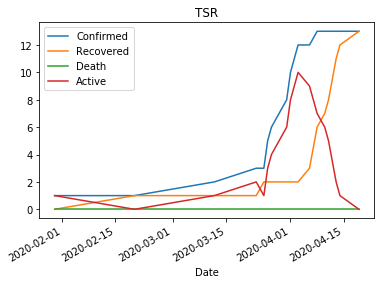

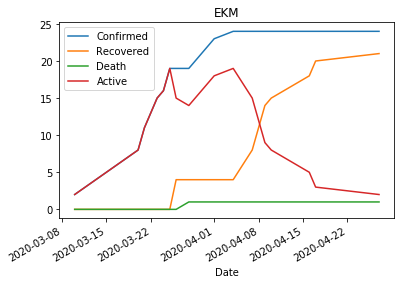

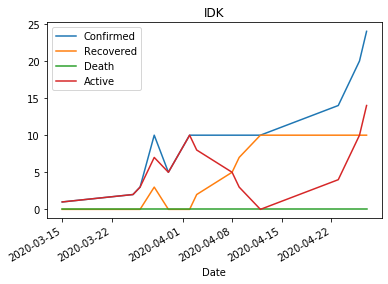

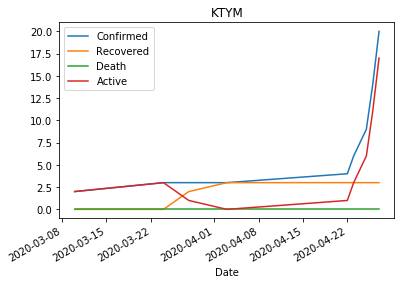

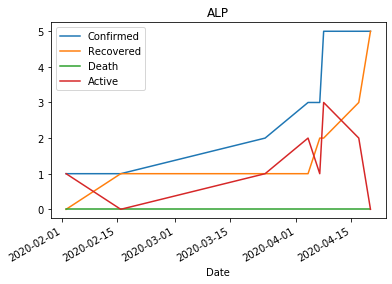

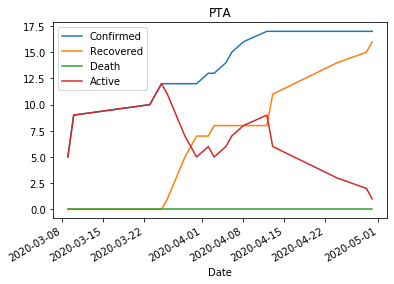

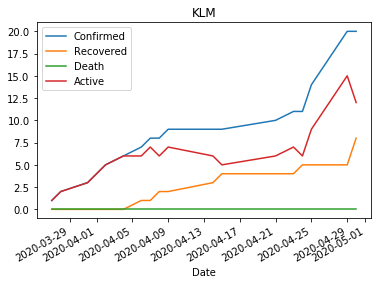

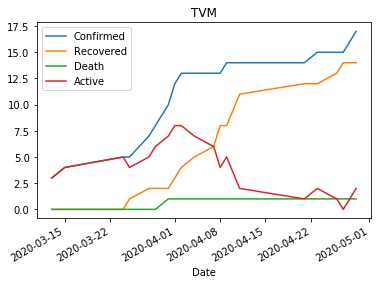

In [7]:
for i in districts:
    temp = df[df['District'] == i]
    cum_data = temp[['Confirmed','Recovered','Death']].cumsum()
    cum_data['Active'] = temp['Active']
    cum_data['Date'] = temp['Date']
    cum_data.set_index('Date',inplace=True)
    cum_data.plot(title=i)

In [8]:
cases = []
for i in districts:
    temp = df[df['District'] == i]
    cases.append([i,max(temp['Active'])])
print(cases)

[['KSD', 155], ['KNR', 61], ['WYD', 3], ['KKD', 11], ['MLPM', 16], ['PKD', 7], ['TSR', 10], ['EKM', 19], ['IDK', 14], ['KTYM', 17], ['ALP', 3], ['PTA', 12], ['KLM', 15], ['TVM', 8]]


In [9]:
cases = pd.DataFrame(cases, columns=['District','Active'])
cases.head(14)

,District,Active
0,KSD,155
1,KNR,61
2,WYD,3
3,KKD,11
4,MLPM,16
5,PKD,7
6,TSR,10
7,EKM,19
8,IDK,14
9,KTYM,17


In [10]:
cases = cases.replace({'District' : { 'KSD' : 'Kasaragod', 'KNR' : 'Kannur', 'WYD' : 'Wayanad', 'KKD' : 'Kozhikode', 'MLPM' : 'Malappuram', 'PKD' : 'Palakkad', 'TSR' : 'Thrissur', 'EKM' : 'Ernakulam', 'IDK' : 'Idukki', 'KTYM' : 'Kottayam', 'ALP' : 'Alappuzha', 'PTA' : 'Pathanamthitta', 'KLM' : 'Kollam', 'TVM' : 'Thiruvananthapuram'   }})

In [11]:
cases.sort_values("Active", axis = 0, ascending = False, inplace = True) 
cases.reset_index(inplace=True,drop=True)
cases.head()

,District,Active
0,Kasaragod,155
1,Kannur,61
2,Ernakulam,19
3,Kottayam,17
4,Malappuram,16


In [12]:
latitude = 10.8505
longitude = 76.2711

world_map = folium.Map(location=[latitude, longitude], zoom_start=8)
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data='district.geojson',
    data=cases,
    columns=['District', 'Active'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='COVID Cased in Kerala',
    reset=True
)

# display map
world_map

C:\Users\ashwi\anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [ ]:
CLIENT_ID = 'client-id' # your Foursquare ID
CLIENT_SECRET = 'client-secret' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
CATEGORY_ID = '4bf58dd8d48988d196941735'  # catrgory for hospitals
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [14]:
districts = cases['District']
type(districts)

pandas.core.series.Series

In [21]:
geolocator = Nominatim(user_agent="my-application")
lat = []
long = []
dis = []

In [24]:
for i in range(0,len(districts)):
    print(i)
    location = geolocator.geocode(districts[i])
    latitude = location.latitude
    longitude = location.longitude
    dis.append(districts[i])
    lat.append(latitude)
    long.append(longitude)
    print(districts[i],latitude,longitude)


10
Thiruvananthapuram 8.5058909 76.9570481
11
Palakkad 10.7691989 76.6512469
12
Wayanad 11.715219000000001 76.12690294658198
13
Alappuzha 9.48870055 76.41256410969626


In [25]:
district_df = pd.DataFrame({'Name':dis,'lat':lat,'long':long})
district_df.head(14)

,Name,lat,long
0,Kasaragod,12.421713,75.190450
1,Kannur,11.876225,75.373804
2,Ernakulam,10.038395,76.507415
3,Kottayam,9.628570,76.645525
4,Malappuram,11.106845,76.109955
5,Kollam,8.966996,76.858289
6,Idukki,9.849787,76.979791
7,Pathanamthitta,9.283404,76.960663
8,Kozhikode,11.244614,75.775937
9,Thrissur,10.525626,76.213254


In [26]:
venues_list = []
for lat, long in zip(district_df['lat'],district_df['long']):

    LIMIT = 100 # limit of number of venues returned by Foursquare API
    radius = 50000 # define radius
    url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&categoryId={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID,
        CATEGORY_ID,
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        long, 
        radius, 
        LIMIT)

    results = requests.get(url).json()["response"]["venues"]
    
    
    venues_list.append([(
        v['name'], 
        v['location']['lat'], 
        v['location']['lng']) for v in results])

nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])

In [27]:
nearby_venues.columns=['name','lat','lang']
nearby_venues.head()

,name,lat,lang
0,Nayanar Memorial Hospital,12.037710,75.363128
1,Dept of periodontics,12.553937,75.383825
2,Medicity Poly Clinic,12.105531,75.204805
3,AJ ICU,12.897971,74.846130
4,Natekal PHC,12.863509,74.847506


In [28]:
latitude = 10.8505
longitude = 76.2711
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=6)

# add markers to the map
markers_colors = []
for lat, lon, poi in zip(nearby_venues['lat'], nearby_venues['lang'], nearby_venues['name']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        fill=True,
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters